In [13]:
import praw
from textblob import TextBlob 
from tkinter import scrolledtext, messagebox
import tkinter.ttk as ttk
import tkinter as tk
import matplotlib.pyplot as plt


In [ ]:
reddit = praw.Reddit(
    client_id="Your_Client_Id",
    client_secret="Your_secret_key",
    user_agent="App_name"
)

In [16]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"


In [17]:
def fetch_and_analyze():
    subreddit_name = subreddit_entry.get()
    post_limit = int(limit_combo.get())

    try:
        subreddit = reddit.subreddit(subreddit_name)
        posts = subreddit.hot(limit=post_limit)

        result_box.delete(1.0, tk.END)
        pos = neu = neg = 0

        for i, post in enumerate(posts, 1):
            sentiment = analyze_sentiment(post.title)
            result_box.insert(tk.END, f"{i}. {post.title}\nSentiment: {sentiment}\n\n")

            if sentiment == "Positive":
                pos += 1
            elif sentiment == "Neutral":
                neu += 1
            else:
                neg += 1

        # Print Summary in Text Area
        result_box.insert(tk.END, f"\nSummary:\nPositive: {pos}, Neutral: {neu}, Negative: {neg}\n")

        # Pie Chart
        labels = ['Positive', 'Neutral', 'Negative']
        sizes = [pos, neu, neg]
        colors = ['#8BC34A', '#FFC107', '#F44336']

        if sum(sizes) > 0:  # Avoid zero division
            plt.figure(figsize=(6, 6))
            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
            plt.title(f"Sentiment Distribution in r/{subreddit_name}")
            plt.axis('equal')
            plt.show()
        else:
            messagebox.showinfo("No Data", "No English posts found to analyze.")

    except Exception as e:
        messagebox.showerror("Error", str(e))


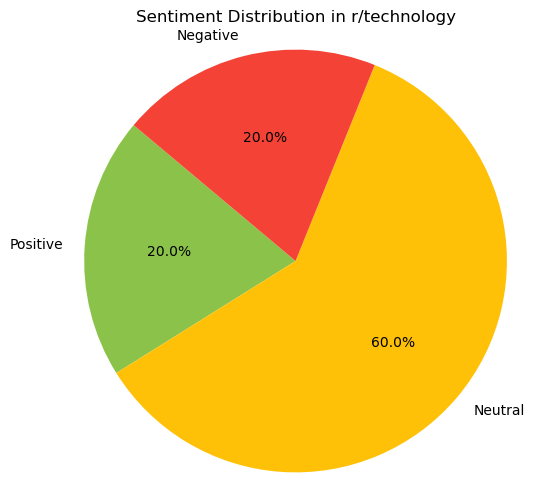

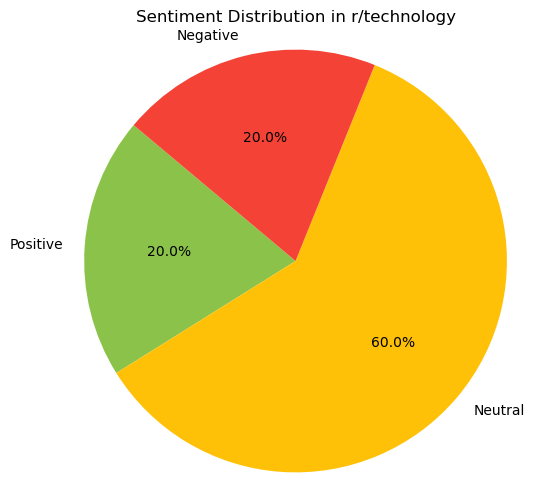

In [18]:
root = tk.Tk()
root.title("Reddit Sentiment Analyzer")
root.geometry("800x600")

tk.Label(root, text="Enter Subreddit (no r/):").pack()
subreddit_entry = tk.Entry(root, width=50)
subreddit_entry.insert(0, "technology")  # default example
subreddit_entry.pack()

tk.Label(root, text="Number of Posts:").pack()
limit_combo = ttk.Combobox(root, values=["5", "10", "20", "50"], state="readonly")
limit_combo.set("10")
limit_combo.pack()

tk.Button(root, text="Analyze", command=fetch_and_analyze).pack(pady=10)

result_box = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=100, height=25)
result_box.pack()

root.mainloop()